In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')

nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rodyd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rodyd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodyd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:

column_names = [
    'News ID', 
    'Category', 
    'SubCategory', 
    'Title', 
    'Abstract', 
    'URL', 
    'Title Entities', 
    'Abstract Entities'
]
# Load news.tsv (adjust path if needed)
df = pd.read_csv(r"C:\Users\rodyd\Downloads\news.tsv\news.tsv", sep='\t', names=column_names)


df.to_csv("../data/news.csv", index=False)



In [4]:
df.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [28]:

df = df[['Title', 'Abstract', 'Category', 'SubCategory']]

df.isna().sum()

Title             0
Abstract       2666
Category          0
SubCategory       0
dtype: int64

In [30]:
df=df.dropna(subset=['Abstract'])
df.isna().sum()

Title          0
Abstract       0
Category       0
SubCategory    0
dtype: int64

In [32]:

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)



# Combine title and abstract
df['combined_text'] = (df['Title'] + " " + df['Abstract']).apply(preprocess_text)

In [34]:
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['combined_text'])

#  Save feature matrix and vectorizer
import pickle
with open('../data/tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(tfidf_matrix, f)
with open('../data/vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [36]:
# 5. Save cleaned dataframe (optional)
df.to_csv('../data/cleaned_news.csv', index=False)


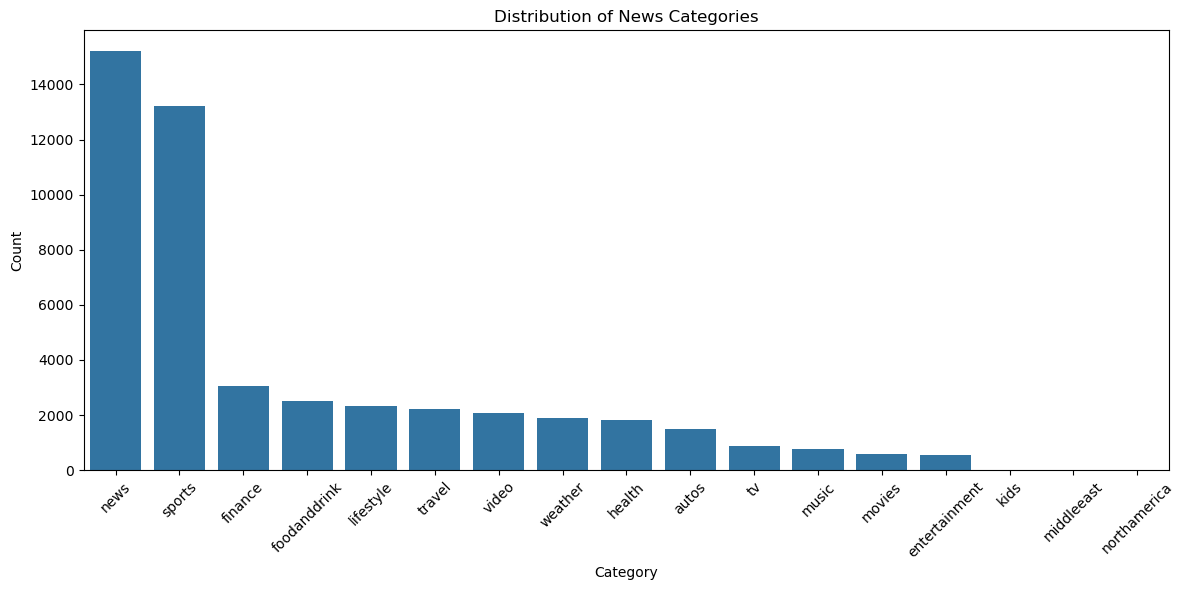

Category distribution plot saved as results/category_distribution.png
Preprocessing complete!


In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../results/category_distribution.png')
plt.show()
print("Category distribution plot saved as results/category_distribution.png")

print("Preprocessing complete!")